In [161]:
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
# Set display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)  # Show all columns

# Optional: Set the display width to ensure all columns fit in the view
pd.set_option('display.width', 1000)

df = pd.read_csv('Motor_Vehicle_Collisions_cpy2.csv')

C:\Users\dougl\AppData\Local\Temp\ipykernel_11312\1355659274.py:8: DtypeWarning: Columns (4,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_cpy2.csv')


# Dropping Unnecessary columns/ information

## GeoCoding Error

There was quite a few uncaught errors with the geocoding program returning locations well outside of New York City. Unfortunately time does not permit me to correct what went wrong so the incorrectly geolocated will be dropped. Fortunately this is a relatively easy task as the reverse geocoding worked extraordinarily well and I can simply drop rows with an invalid SUBURB/BOROUGH values

In [163]:
# Specify the values of interest
values_of_interest = [
    'Brooklyn',
    'Queens County',
    'Manhattan',
    'The Bronx',
    'Staten Island',
    'Queens',
    'Kings County'
]

# Filter rows where SUBURB is not in values_of_interest
dougs_booboo = df[~df['SUBURB'].isin(values_of_interest)]
dougs_booboo.shape

(154612, 41)

Doug's booboo currently contains all of the values that don't fit into appropriate suburbs, even the ones that aren't corrupted but simply didn't contain enough information to pass geocoding (values the longitude and latitude couldn't be salvaged.) To get a better idea of just how much damage this booboo caused we must first filter out the values with nan in longitude and latitude.

Since the set of columns missing longitude is identical to that of latitude we can simply drop one or the other.

In [164]:
dougs_booboo = dougs_booboo.dropna(subset=['LATITUDE'])
dougs_booboo.shape

(15525, 41)

Ultimately 15525 of the roughly 50,000 values that geolocating retrieved coordinates for where corrupted in some sense. Not as tragic of a loss as I originally suspected. Since there was effectively no data lost, as the results of the geolocating were added as new columns as opposed to overwriting the original columns we have options in regards to how we correct this error. Given the time constraints however we will simply dispose of the incorrect values as the effect on the model should be relatively minor given the total size of the dataset.

In [165]:
eyesore = dougs_booboo['SUBURB'].value_counts()
eyesore.head(200)

SUBURB
Poverest                         169
York                              81
Mickleover                        55
الرقة                             37
Country Club Plaza                35
Coleman                           35
Clayton-le-Woods                  34
Fanti Town Bardnerville           30
Grandview                         29
Millbrook                         27
Παλαιό Φάληρο                     24
石門 Shek Mun                       20
Fleetwood                         19
PJ State                          17
Hazelmere                         16
Branscombe                        15
Ringwood                          14
Newton                            12
Avalon Beach                      12
Richmond County                   11
الحيرة                            10
North Gloversville                10
Clayton Heights                   10
Westport                          10
Thulamela Ward 36                 10
Surrey Centre                      9
الشرق                          

In [166]:
eyesore.shape

(445,)

So now we make the entirety of Doug's boo boo dissapear.

In [167]:
# Create a mapping for the values to be merged
suburb_mapping = {
    'Kings County': 'Brooklyn',
    'Queens County': 'Queens'
}

# Replace the values in the 'SUBURB' column based on the mapping
df['SUBURB'] = df['SUBURB'].replace(suburb_mapping)

In [168]:
# Specify the values of interest
values_of_interest = [
    'Brooklyn',
    'Queens County',
    'Manhattan',
    'The Bronx',
    'Staten Island',
    'Queens',
    'Kings County'
]

# Filter rows where SUBURB is in values_of_interest
df = df[df['SUBURB'].isin(values_of_interest)]
df.shape

(1900995, 41)

In [169]:
df['SUBURB'].value_counts()

SUBURB
Brooklyn         579921
Queens           542015
Manhattan        397909
The Bronx        285173
Staten Island     95977
Name: count, dtype: int64

In [170]:
df.columns

Index(['Unnamed: 0', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'FULL ADDRESS', 'HOUSE NUMBER', 'ROAD', 'NEIGHBOURHOOD', 'SUBURB', 'POSTCODE', 'day_of_week', 'is_weekend', 'CRASH HOUR', 'is_holiday', 'holiday_name'], dtype='object')

In [171]:
cols_to_drop = ['BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'FULL ADDRESS', 'HOUSE NUMBER']
df = df.drop(columns = cols_to_drop)
df.columns

Index(['Unnamed: 0', 'CRASH DATE', 'CRASH TIME', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'ROAD', 'NEIGHBOURHOOD', 'SUBURB', 'POSTCODE', 'day_of_week', 'is_weekend', 'CRASH HOUR', 'is_holiday', 'holiday_name'], dtype='object')

In [172]:
print(df.isnull().sum())

Unnamed: 0                             0
CRASH DATE                             0
CRASH TIME                             0
LATITUDE                               0
LONGITUDE                              0
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6483
CONTRIBUTING FACTOR VEHICLE 2     301775
CONTRIBUTING FACTOR VEHICLE 3    1766779
CONTRIBUTING FACTOR VEHICLE 4    1870414
CONTRIBUTING FACTOR VEHICLE 5    1892578
COLLISION_ID                           0
VEHICLE TYPE CODE 1                13110
VEHICLE TYPE CODE 2               375226
VEHICLE TYPE CODE 3              1771781
VEHICLE TYPE CODE 4              1871481
VEHICLE TYPE CODE 5              1892826
ROAD            

In [173]:
df = df.dropna(subset=['LATITUDE'])

In [174]:
df['NUMBER OF PERSONS KILLED'].value_counts()

NUMBER OF PERSONS KILLED
0.0    1898267
1.0       2643
2.0         67
3.0         12
4.0          4
8.0          1
5.0          1
Name: count, dtype: int64

In [175]:
print(df.isnull().sum())

Unnamed: 0                             0
CRASH DATE                             0
CRASH TIME                             0
LATITUDE                               0
LONGITUDE                              0
NUMBER OF PERSONS INJURED              0
NUMBER OF PERSONS KILLED               0
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6483
CONTRIBUTING FACTOR VEHICLE 2     301775
CONTRIBUTING FACTOR VEHICLE 3    1766779
CONTRIBUTING FACTOR VEHICLE 4    1870414
CONTRIBUTING FACTOR VEHICLE 5    1892578
COLLISION_ID                           0
VEHICLE TYPE CODE 1                13110
VEHICLE TYPE CODE 2               375226
VEHICLE TYPE CODE 3              1771781
VEHICLE TYPE CODE 4              1871481
VEHICLE TYPE CODE 5              1892826
ROAD            

In [176]:
df.shape

(1900995, 33)

# Time Series 

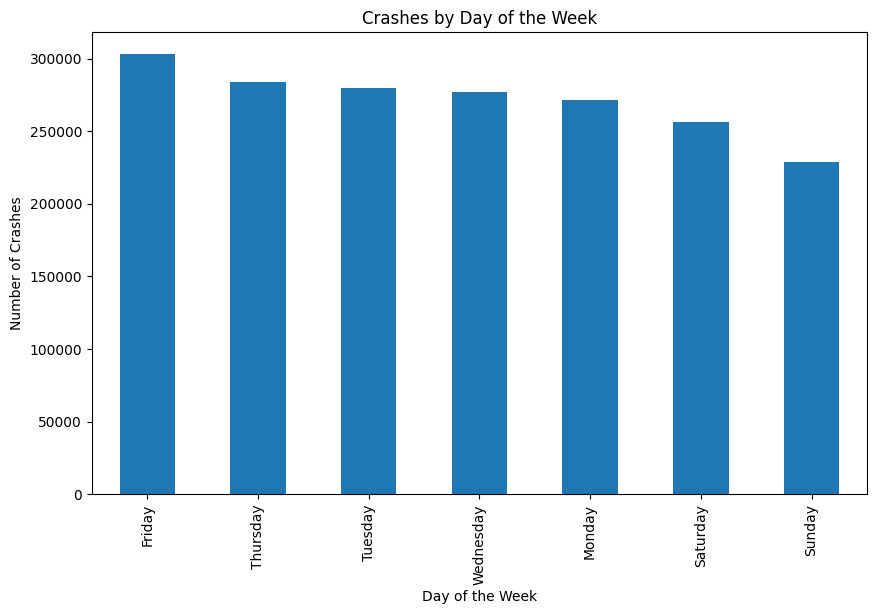

In [177]:
# Count crashes per day of the week
day_counts = df['day_of_week'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.show()

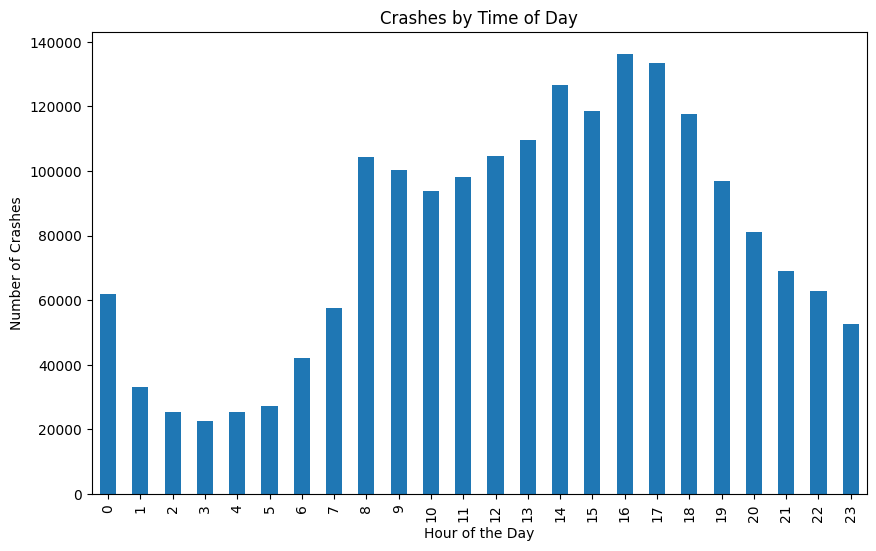

In [178]:
# Count crashes per hour
hour_counts = df['CRASH HOUR'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar')
plt.title('Crashes by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

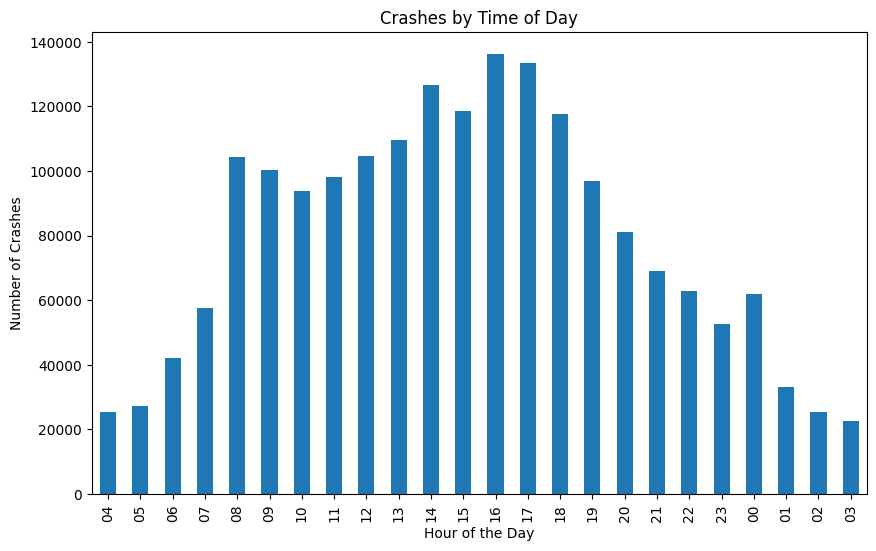

In [192]:
# Get the counts of crashes per hour
hour = df['CRASH HOUR'].value_counts().sort_index()


# shift the start and end time of the graph to better fit standard distribution
shift = list(range(4, 24)) + list(range(0, 4))

# Reindex hour to match the custom order
hour = hour.reindex(shift, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar')
plt.title('Crashes by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.xticks(ticks=range(len(shift)), labels=[f'{hour:02d}' for hour in shift])
plt.show()

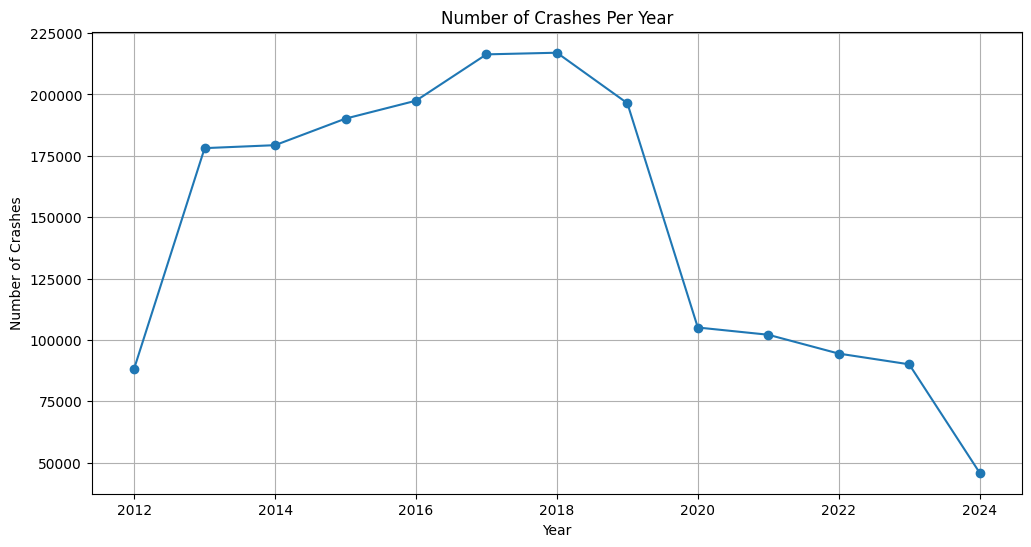

In [179]:
# Convert CRASH DATE to datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Group by year and count the number of crashes
crashes_per_year = df.groupby(df['CRASH DATE'].dt.year).size()

# Plot
plt.figure(figsize=(12, 6))
crashes_per_year.plot(kind='line', marker='o')
plt.title('Number of Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

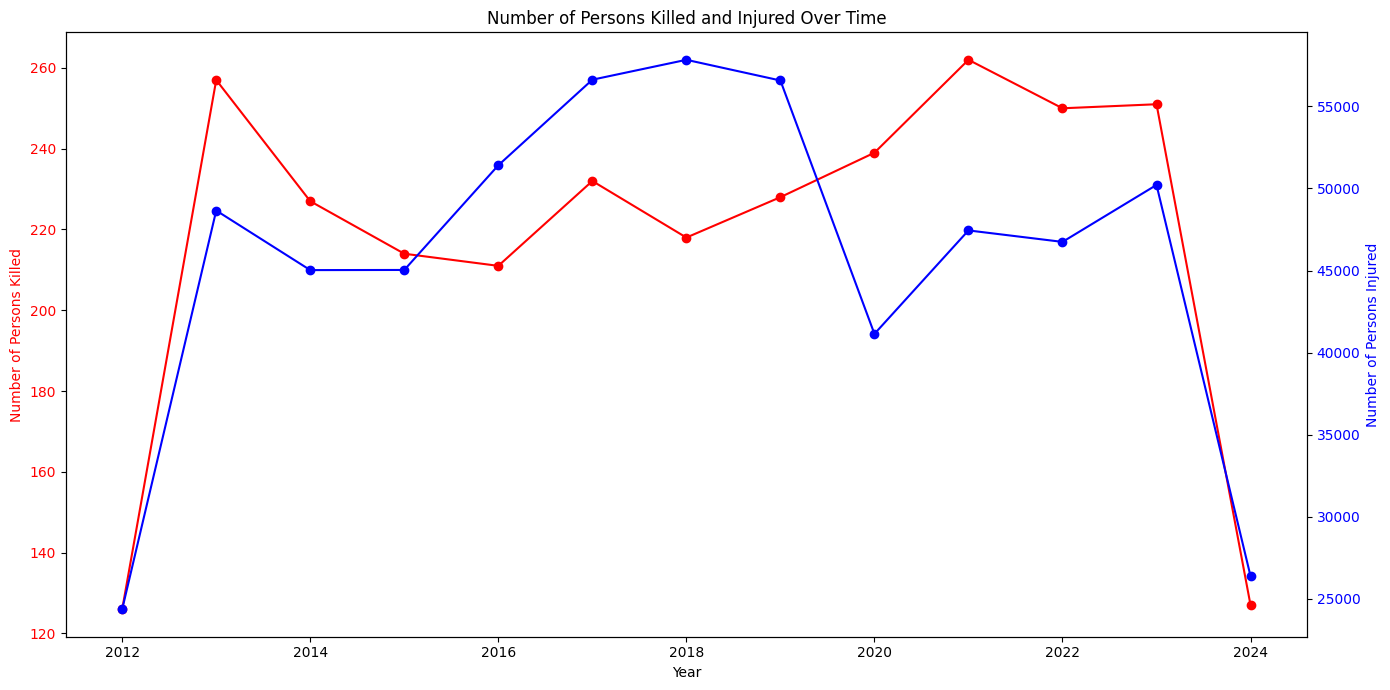

In [180]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Group by year and sum the number of persons killed and injured
annual_stats = df.groupby(df['CRASH DATE'].dt.year).agg({
    'NUMBER OF PERSONS KILLED': 'sum',
    'NUMBER OF PERSONS INJURED': 'sum'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot number of persons killed
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Persons Killed', color='red')
ax1.plot(annual_stats['CRASH DATE'], annual_stats['NUMBER OF PERSONS KILLED'], marker='o', color='red', label='Number of Persons Killed')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis for number of persons injured
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Persons Injured', color='blue')
ax2.plot(annual_stats['CRASH DATE'], annual_stats['NUMBER OF PERSONS INJURED'], marker='o', color='blue', label='Number of Persons Injured')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Number of Persons Killed and Injured Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [181]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
unspecified                      645241
driver distraction/impairment    469690
improper driving technique       392018
traffic rule violation           180883
external distraction/obstacle    111435
poor road conditions              41719
alcohol/drug use                  36251
vehicle defect                    14132
electronics use                    3073
police chase                         70
Name: count, dtype: int64

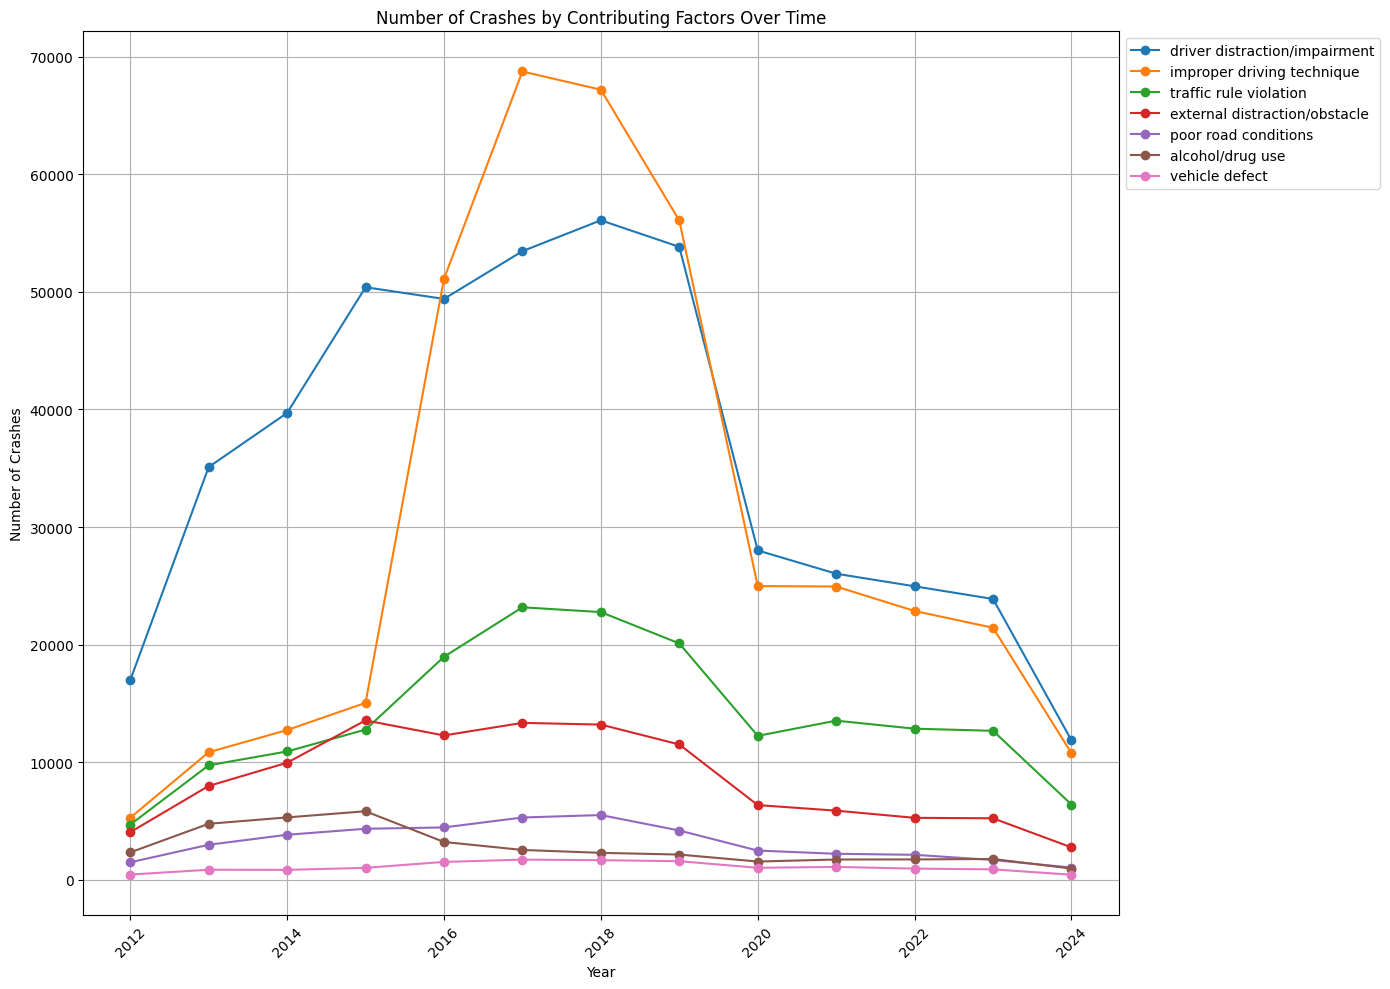

In [182]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Count number of crashes by year and contributing factor
annual_factors = df.groupby([df['CRASH DATE'].dt.year, 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='NUMBER OF CRASHES')

# List of contributing factors to loop through
contributing_factors = [
    'driver distraction/impairment',
    'improper driving technique',
    'traffic rule violation',
    'external distraction/obstacle',
    'poor road conditions',
    'alcohol/drug use',
    'vehicle defect'
]

plt.figure(figsize=(14, 10))

for factor in contributing_factors:
    factor_data = annual_factors[annual_factors['CONTRIBUTING FACTOR VEHICLE 1'] == factor]
    
    plt.plot(factor_data['CRASH DATE'], factor_data['NUMBER OF CRASHES'], marker='o', label=f'{factor}')

plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Contributing Factors Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

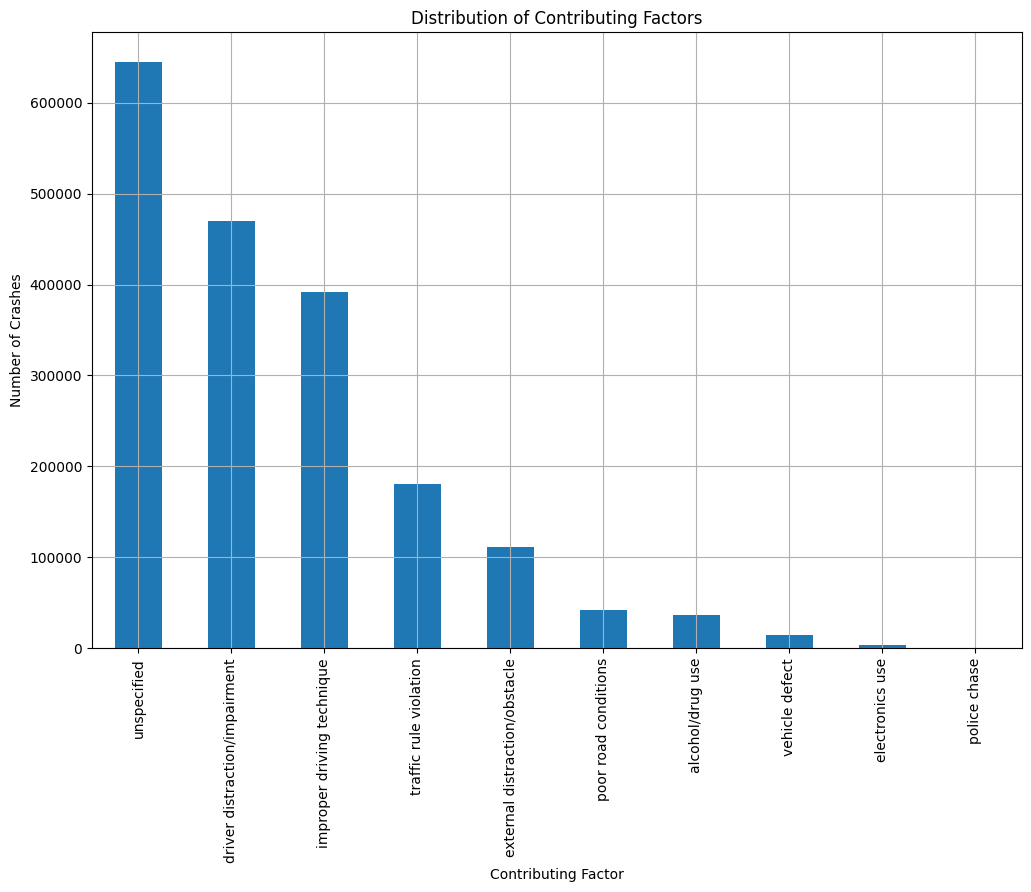

In [183]:
# Count crash types
crash_type_counts = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
crash_type_counts.plot(kind='bar')
plt.title('Distribution of Contributing Factors')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

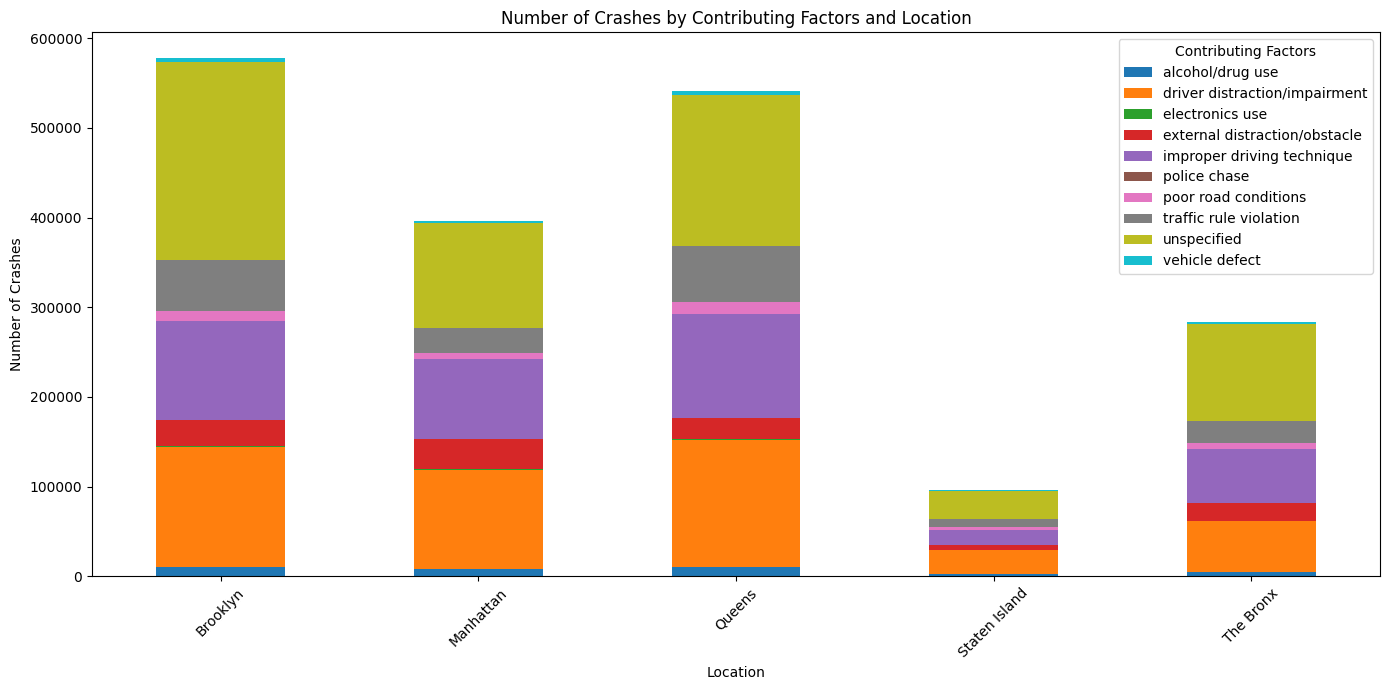

In [184]:
# Count number of crashes by location and contributing factor
location_factors = df.groupby(['SUBURB', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='NUMBER OF CRASHES')

# Pivot the data for easier plotting
pivot_table = location_factors.pivot(index='SUBURB', columns='CONTRIBUTING FACTOR VEHICLE 1', values='NUMBER OF CRASHES').fillna(0)

# Plot
pivot_table.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.xlabel('Location')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Contributing Factors and Location')
plt.xticks(rotation=45)
plt.legend(title='Contributing Factors')
plt.tight_layout()

# Show the plot
plt.show()

In [185]:
sub = df['SUBURB'].value_counts()
sub.head

<bound method NDFrame.head of SUBURB
Brooklyn         579921
Queens           542015
Manhattan        397909
The Bronx        285173
Staten Island     95977
Name: count, dtype: int64>

In [186]:
# Specify the values of interest
values_of_interest = [
    'Brooklyn',
    'Queens County',
    'Manhattan',
    'The Bronx',
    'Staten Island',
    'Queens',
    'Kings County'
]

# Count rows for each specified value
counts = {}
for value in values_of_interest:
    counts[value] = df[df['SUBURB'] == value].shape[0]

# Sum the counts
total = sum(counts.values())

print(total)

1900995


In [187]:
# Assuming df is your dataframe and CRASH DATE is the date column
# Ensure CRASH DATE is in datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Add month and week of the year features
df['month_of_year'] = df['CRASH DATE'].dt.month
df['week_of_year'] = df['CRASH DATE'].dt.isocalendar().week


In [188]:
import folium

# Filter data for incidents where there was a fatality
df_fatalities = df[df['NUMBER OF PERSONS KILLED'] > 0]
df_fatalities = df_fatalities[df_fatalities['CRASH DATE'].dt.year == 2015]

# Calculate the mean latitude and longitude for the fatality data
mean_latitude_fatalities = df_fatalities['LATITUDE'].mean()
mean_longitude_fatalities = df_fatalities['LONGITUDE'].mean()

# Create a base map centered on the mean latitude and longitude values for fatality data
m = folium.Map(location=[mean_latitude_fatalities, mean_longitude_fatalities], zoom_start=12)

# Add points to the map for fatality data
for idx, row in df_fatalities.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=2,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Display the map
m